In [138]:
import mdtraj as md
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math
from numpy import log2, zeros, mean, var, sum, loadtxt, arange, \
                  array, cumsum, dot, transpose, diagonal, floor
from numpy.linalg import inv, lstsq

In [139]:
from PIL import Image
from IPython.display import display

https://figshare.com/articles/dataset/Microsecond_molecular_dynamics_simulation_of_kinase_domain_of_the_human_tyrosine_kinase_ABL1/4496795/1

This is a one microsecond trajectory of the catalytic domain of the human tyrosine protein kinase ABL1 (UNIPROT:ABL1_HUMAN, residues 242-493). The simulation was generated on Folding@home using OpenMM 6.3.1 with the AMBER99SB-ILDN forcefield, TIP3P water, and neutralizing salt. A Langevin integrator with 2 fs timestep, 300 K temperature, and 1/ps collision rate was used. PME with a nonbonded cutoff of 1.0 nm was used with default tolerance of 5.0e-4. A long-range isotropic dispersion correction was used to correct for the truncation of Lennard-Jones interactions at 1.0 nm. A molecular-scaling Monte Carlo barostat was applied using a 1 atm reference pressure, with MC moves attempted every 50 steps. Coordinates were saved every 250ps, and waters and ions stripped. The trajectory file contains 4000 snapshots. Initial models were generated with Ensembler (see References) using the ABL1 structure from chain B of PDB ID: 2GQG as a template.

https://www.rcsb.org/structure/2GQG

Trajetories and pdb can be downloaded here:
https://www.dropbox.com/s/qymy39ak2apqd75/ABL1.zip?dl=0


In [2]:
pdb='/Users/anjalidhar/Desktop/chem101.6/CHEM101.6/Exercise2/ABL1.pdb'
trajectory='/Users/anjalidhar/Desktop/chem101.6/CHEM101.6/Exercise2/ABL1.dcd'
outdir='/Users/anjalidhar/Desktop/chem101.6/CHEM101.6/Exercise2/out'
    
print("outdir:",outdir)
print("pdb:",pdb)
print("trajectory:",trajectory)

outdir: /Users/anjalidhar/Desktop/chem101.6/CHEM101.6/Exercise2/out
pdb: /Users/anjalidhar/Desktop/chem101.6/CHEM101.6/Exercise2/ABL1.pdb
trajectory: /Users/anjalidhar/Desktop/chem101.6/CHEM101.6/Exercise2/ABL1.dcd


In [3]:
trj = md.load(trajectory, top=pdb,stride=1)
trj.center_coordinates()
top = trj.topology
first_frame = 0
last_frame = trj.n_frames
n_frames = trj.n_frames

In [109]:
nres=[res.resSeq for res in trj.top.residues]
sequence=[residue for residue in trj.topology.residues]
resname=[residue.name for residue in trj.topology.residues]
resindex=[residue.index for residue in trj.topology.residues]
res_num=[residue.resSeq  for residue in trj.topology.residues]



# #log = open("/Users/paulrobustelli/Desktop/Sa_calc.log", "w")
# print("** SYSTEM INFO **\n")
# print("Number of atoms: %d\n" % trj.n_atoms) # huh weird
# print("Number of residues: %d\n" % len(set(nres)))
# print("Number of frames: %d\n" % trj.n_frames)
# print("Starting frame: %d\n" % first_frame)
# print("Last frame: %d\n" % last_frame)
# print("sequence: %s\n" % sequence)
# print("residue names: %s\n" % resname)
# print("residue number: %s\n" % res_num)
# print("residue index: %s\n" % resindex)


In [5]:
# residue_num=[]
# for res in top.residues: 
#     residue_num.append(res.resSeq)
residue_id=np.asarray(nres)
residue_id
residue_num = nres

DSSP: take distance of the ON, CH, OH, CN of the backbone, takes h-bond, takes the dihedral, spits out the secondary structure (helix, backbone, loop, etc)

In [6]:
#Use DSSP to calculate the secondary structure definition
#https://mdtraj.org/1.9.4/api/generated/mdtraj.compute_dssp.html
dssp=md.compute_dssp(trj,simplified=True)
# for every frame, assigns secondary struc to every resiude (n_frames, n_res)
dssp

array([['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ['C', 'E', 'E', ..., 'H', 'C', 'C'],
       ['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ...,
       ['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ['C', 'E', 'E', ..., 'C', 'C', 'C']], dtype='<U2')

In [ ]:
# simplified:
# H: helix 
# E: beta

In [7]:
print(dssp.shape)
print("Rows:",len(dssp))
print("Columns:",len(dssp[0]))

#Print out helix and beta residues for a given frame
frame=0
dssp_frame=np.column_stack((residue_id,dssp[frame]))
helix_res=np.where(dssp_frame[:,1]=='H')
beta_res=np.where(dssp_frame[:,1]=='E')
print('helical residues:',dssp_frame[helix_res])
print('beta residues:',dssp_frame[beta_res])

(4000, 252)
Rows: 4000
Columns: 252
helical residues: [['280' 'H']
 ['281' 'H']
 ['282' 'H']
 ['283' 'H']
 ['284' 'H']
 ['285' 'H']
 ['286' 'H']
 ['287' 'H']
 ['288' 'H']
 ['289' 'H']
 ['323' 'H']
 ['324' 'H']
 ['325' 'H']
 ['326' 'H']
 ['327' 'H']
 ['337' 'H']
 ['338' 'H']
 ['339' 'H']
 ['340' 'H']
 ['341' 'H']
 ['342' 'H']
 ['343' 'H']
 ['344' 'H']
 ['345' 'H']
 ['346' 'H']
 ['347' 'H']
 ['348' 'H']
 ['349' 'H']
 ['350' 'H']
 ['351' 'H']
 ['352' 'H']
 ['353' 'H']
 ['354' 'H']
 ['355' 'H']
 ['356' 'H']
 ['357' 'H']
 ['366' 'H']
 ['367' 'H']
 ['368' 'H']
 ['373' 'H']
 ['374' 'H']
 ['375' 'H']
 ['403' 'H']
 ['404' 'H']
 ['405' 'H']
 ['408' 'H']
 ['409' 'H']
 ['410' 'H']
 ['411' 'H']
 ['412' 'H']
 ['413' 'H']
 ['420' 'H']
 ['421' 'H']
 ['422' 'H']
 ['423' 'H']
 ['424' 'H']
 ['425' 'H']
 ['426' 'H']
 ['427' 'H']
 ['428' 'H']
 ['429' 'H']
 ['430' 'H']
 ['431' 'H']
 ['432' 'H']
 ['433' 'H']
 ['449' 'H']
 ['450' 'H']
 ['451' 'H']
 ['452' 'H']
 ['453' 'H']
 ['466' 'H']
 ['467' 'H']
 ['468' 'H

(300.0, 350.0)

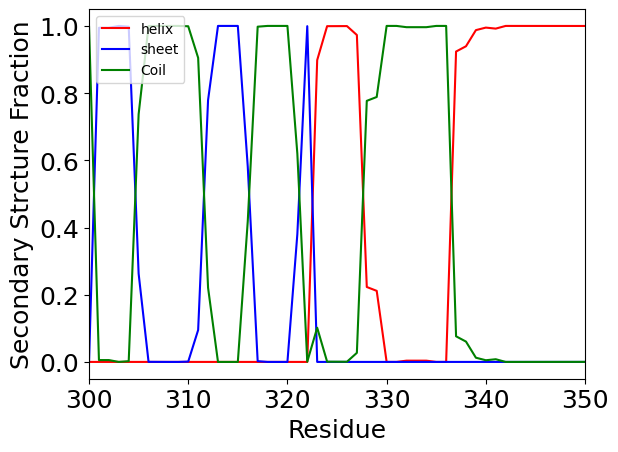

In [89]:
dssp=md.compute_dssp(trj,simplified=True)

def dssp_convert(dssp):
    # finding helical propensity 
    dsspH=np.copy(dssp)
    dsspE=np.copy(dssp)
    dsspH[dsspH=='H']=1                                                                                      
    dsspH[dsspH=='E']=0                                                                                      
    dsspH[dsspH=='C']=0                                                                                      
    dsspH[dsspH=='NA']=0 
    dsspH=dsspH.astype(int)
    Hprop=np.sum(dsspH,axis=0).astype(float)/len(dsspE) # sum down each col, we get a value for each residues helical propensity 

    # finding beta sheet propensity
    dsspE[dsspE=='H']=0
    dsspE[dsspE=='E']=1
    dsspE[dsspE=='C']=0
    dsspE[dsspE=='NA']=0
    dsspE=dsspE.astype(int)
    Eprop=np.sum(dsspE,axis=0).astype(float)/len(dsspE) 
    
    dsspC = np.where(dssp == "C", 1, 0)
    Cprop=np.sum(dsspC,axis=0).astype(float)/len(dsspC) 

    return Hprop, Eprop, Cprop

Hprop,Eprop, Cprop =dssp_convert(dssp)
plt.plot(residue_num,Hprop,c='r',label='helix')
plt.plot(residue_num,Eprop,c='b',label='sheet')
plt.plot(residue_num,Cprop,c='g',label='Coil')

plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Strcture Fraction', size=18)
plt.tick_params(labelsize=18)
plt.xlim(300,350)


We can see where the fluctuations are! We see two non stable helices here

### ***HOMEWORK Problem 1*** ###

**Use the full DSSP set of secondary structure assignments to plot the population of another secondary structure type and visualize it with a representative frame or frames in VMD**

**Consult the original DSSP paper (or online documentaiton) to confirm the criteria for this assignment** 

Kabsch W, Sander C (1983). “Dictionary of protein secondary structure: pattern recognition of hydrogen-bonded and geometrical features”. Biopolymers 22 (12): 2577-637. doi:10.1002/bip.360221211

dssp=md.compute_dssp(trj,simplified=False)

https://mdtraj.org/1.9.4/api/generated/mdtraj.compute_dssp.html

The DSSP assignment codes are:

‘H’ : Alpha helix

‘B’ : Residue in isolated beta-bridge

‘E’ : Extended strand, participates in beta ladder

‘G’ : 3-helix (3/10 helix)

‘I’ : 5 helix (pi helix)

‘T’ : hydrogen bonded turn

‘S’ : bend

‘ ‘ : Loops and irregular elements

The simplified DSSP codes are:

‘H’ : Helix. Either of the ‘H’, ‘G’, or ‘I’ codes.

‘E’ : Strand. Either of the ‘E’, or ‘B’ codes.

‘C’ : Coil. Either of the ‘T’, ‘S’ or ‘ ‘ codes.

In [9]:
# First, checking out to see what we got in this: 
dssp_full=md.compute_dssp(trj,simplified=False)

In [11]:
np.where(dssp_full == 'S')

(array([   0,    0,    0, ..., 3999, 3999, 3999]),
 array([  6,   7,   8, ..., 237, 238, 241]))

(275.0, 325.0)

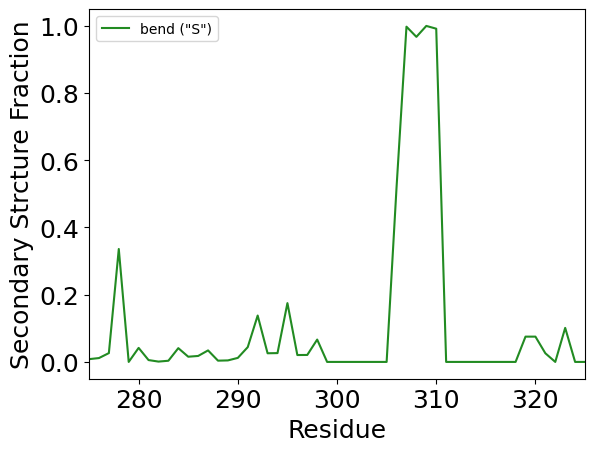

In [14]:
####HOMEWORK ######
#Use the full DSSP Definition and plot the population of another secondary structure type 
#https://mdtraj.org/1.9.4/api/generated/mdtraj.compute_dssp.html

# Now, let's look at S (bend)
def full_dssp_convert(dssp_full):
    # finding helical propensity 
    dsspS=np.copy(dssp)
    dsspE=np.copy(dssp)
    dsspS = np.where(dssp_full == "S", 1, 0)
    Sprop=np.sum(dsspS,axis=0).astype(float)/len(dsspS) # sum down each col, we get a value for each residues helical propensity 
    return Sprop

sprop=full_dssp_convert(dssp_full)
plt.plot(residue_num,sprop,c='forestgreen',label='bend ("S")')

plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Strcture Fraction', size=18)
plt.tick_params(labelsize=18)
plt.xlim(275,325)

So, in VMD, lets look at residues 306-310, that should be in this bend conformation for most of the trajectory: 

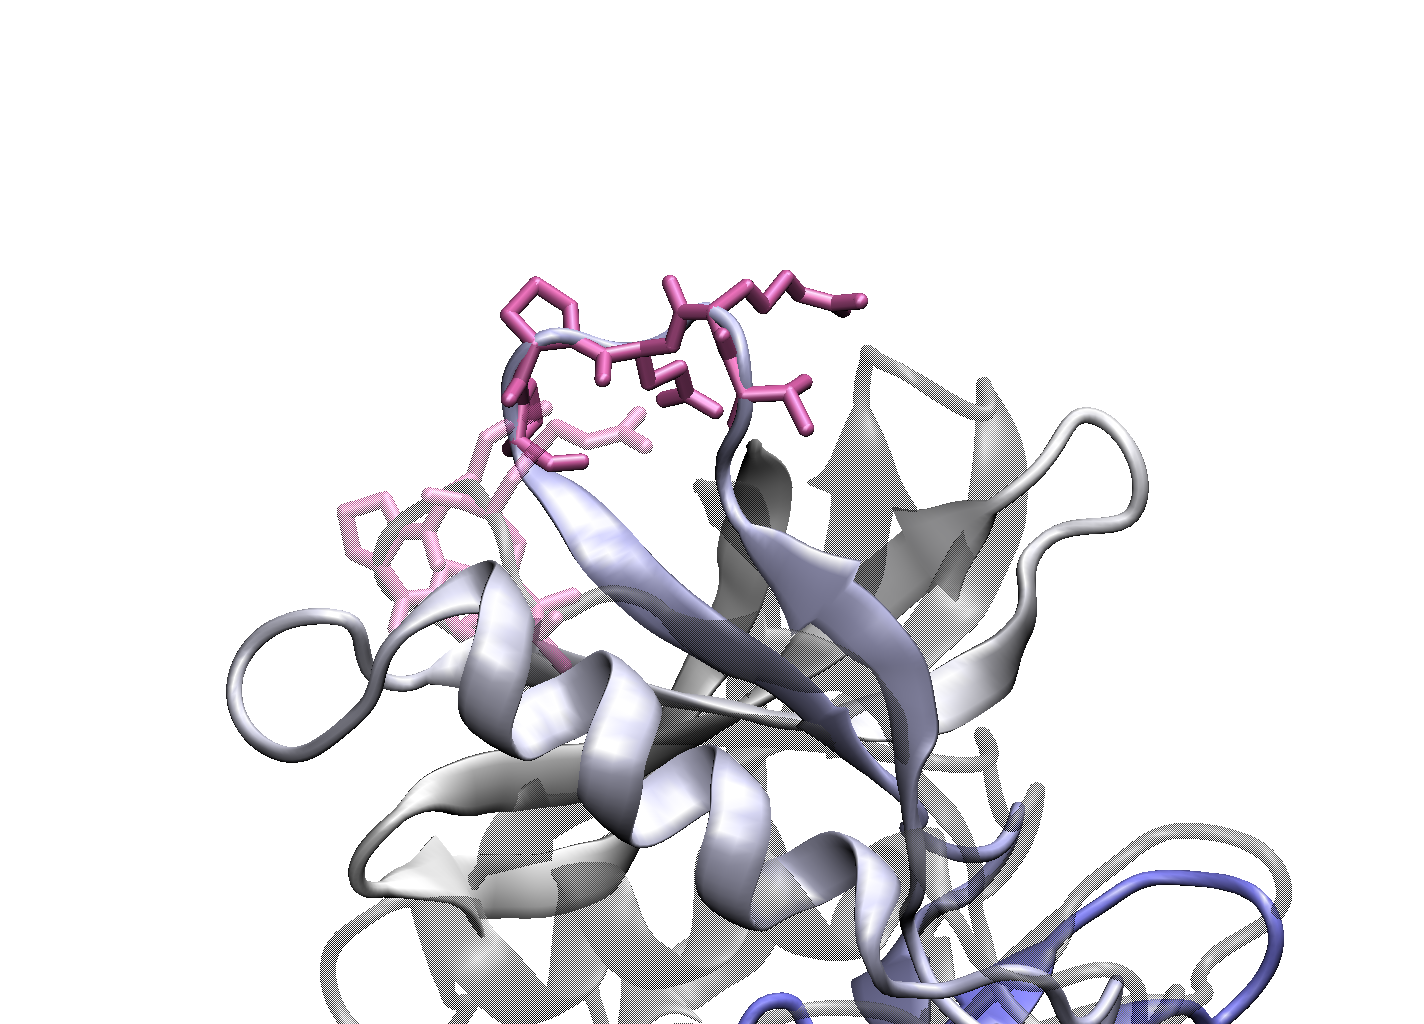

In [21]:
img = Image.open(f'{outdir}/q1.png')
display(img)

Here is frame 1894 in opaque, where frame 0 is translucent, with residues 306-310 highlighted in a nice mauve licorice. Although this bend does move considerably throughout the trajectory, it does remain intact. We can see that it connects two beta sheets. 

### ***Challenge Problem #1*** ###

**Write function/efficient loop to calculate all secondary structure populations from the dssp_full definitions 
and write out all residues numbers with > 90% of each seondary structure type**

In [22]:
#### Challenge Problem Write a Function to Compute the Population of Any Secondary Structure Type
#### Write a loop to plot all populations
#### Write code to output the residue numbers of every residue with > 90% each SS type

def anydssp_90(dssp_full, structure_str, residue_list):
    # finding helical propensity 
    dssp_struc = np.where(dssp_full == structure_str, 1, 0)
    prop=np.sum(dssp_struc,axis=0).astype(float)/len(dssp_struc) 
    return residue_list[np.where(prop>0.9)]


In [45]:
res_idx = np.array(nres)

In [46]:
struc_str_list = ['H', 'B', 'E', 'G', 'I', 'T', 'S', '']
struc_labels = ['alpha helix', 'isolated beta bridge', 'extended strand', '3-helix', '5-helix', 
                'h-bond turn', 'bend', 'loops/irreg elements']

for letter, label in zip(struc_str_list, struc_labels): 
    res_i = anydssp_90(dssp_full, letter, res_idx)
    print(f'Residues with >90% propensity of {label} ("{letter}"): {res_i}')

Residues with >90% propensity of alpha helix ("H"): [281 282 283 324 325 326 327 337 338 339 340 341 342 343 344 345 346 347
 348 349 350 351 352 353 354 355 410 411 422 423 424 425 426 427 428 429
 430 431 432 433 466 467 468 469 470 471 472 473 474 475 486 487 488 489]
Residues with >90% propensity of isolated beta bridge ("B"): [298]
Residues with >90% propensity of extended strand ("E"): [246 247 248 249 255 256 257 258 259 260 261 266 267 268 269 270 271 272
 301 302 303 304 313 314 315 369 370 371 377 378 379 392 393 394 415 416
 417]
Residues with >90% propensity of 3-helix ("G"): []
Residues with >90% propensity of 5-helix ("I"): []
Residues with >90% propensity of h-bond turn ("T"): [262 263 264 265 275 276 277 296 297 319 320 332 333 334 358 418 419 434
 435]
Residues with >90% propensity of bend ("S"): [307 308 309 310 390 391 414 436 439 440 478 479 483]
Residues with >90% propensity of loops/irreg elements (""): []


### ***HOMEWORK Problem 2*** ###

**Identify a residue that has a substantial population (>10%) of a second secondary structure assignment 
(for example something that is 50% helix/ 50% coil or 80% helix/ 20% coil) and make representative snapshots to illustrate the 2 conformations.  Can you identify any other structural changes in the vicinity of that residue that favor the 2nd conformation**

In [71]:
nframes = len(dssp[:, 0])

In [101]:
resname[312-242]

'TYR'

In [94]:
#Find all the frames where a given residue is H or E
residue_number=312
array_index=residue_number-242
helix_frames=np.where(dssp[:,array_index]=='H') # frames where residue is helix
beta_frames=np.where(dssp[:,array_index]=='E') # frames where residue is beta 
coil_frames=np.where(dssp[:,array_index]=='C') # frames where residue is coil

print("Residue %s"%np.asarray(residue_num)[array_index])
print("helical prop:",helix_frames[0].shape[0]/nframes)
print("beta prop:", beta_frames[0].shape[0]/nframes)
print("coil prop:", len(coil_frames[0])/nframes)
print("coil frames:", coil_frames[0])

Residue 312
helical prop: 0.0
beta prop: 0.77925
coil prop: 0.22075
coil frames: [ 162  176  182  197  200  201  203  205  209  211  214  215  216  323
  324  326  372  387  399  400  402  403  404  405  406  407  409  425
  427  428  439  454  456  460  461  462  463  464  465  466  467  468
  509  510  511  512  513  514  515  516  517  518  519  520  521  522
  523  524  527  528  529  530  531  532  533  535  536  538  539  540
  544  570  650  671  672  694  697  733  746  780  886  922  937  942
  968 1034 1035 1036 1037 1040 1043 1044 1048 1051 1053 1084 1093 1095
 1096 1112 1133 1135 1138 1139 1140 1142 1145 1146 1147 1148 1149 1150
 1153 1155 1157 1158 1161 1163 1165 1166 1167 1169 1170 1173 1174 1179
 1180 1181 1182 1183 1184 1185 1186 1187 1188 1189 1190 1191 1193 1194
 1197 1198 1200 1201 1202 1204 1218 1222 1223 1225 1226 1230 1237 1238
 1239 1240 1333 1371 1373 1374 1375 1380 1381 1383 1384 1385 1386 1387
 1393 1398 1399 1400 1401 1402 1403 1404 1405 1406 1407 1408 1409 1

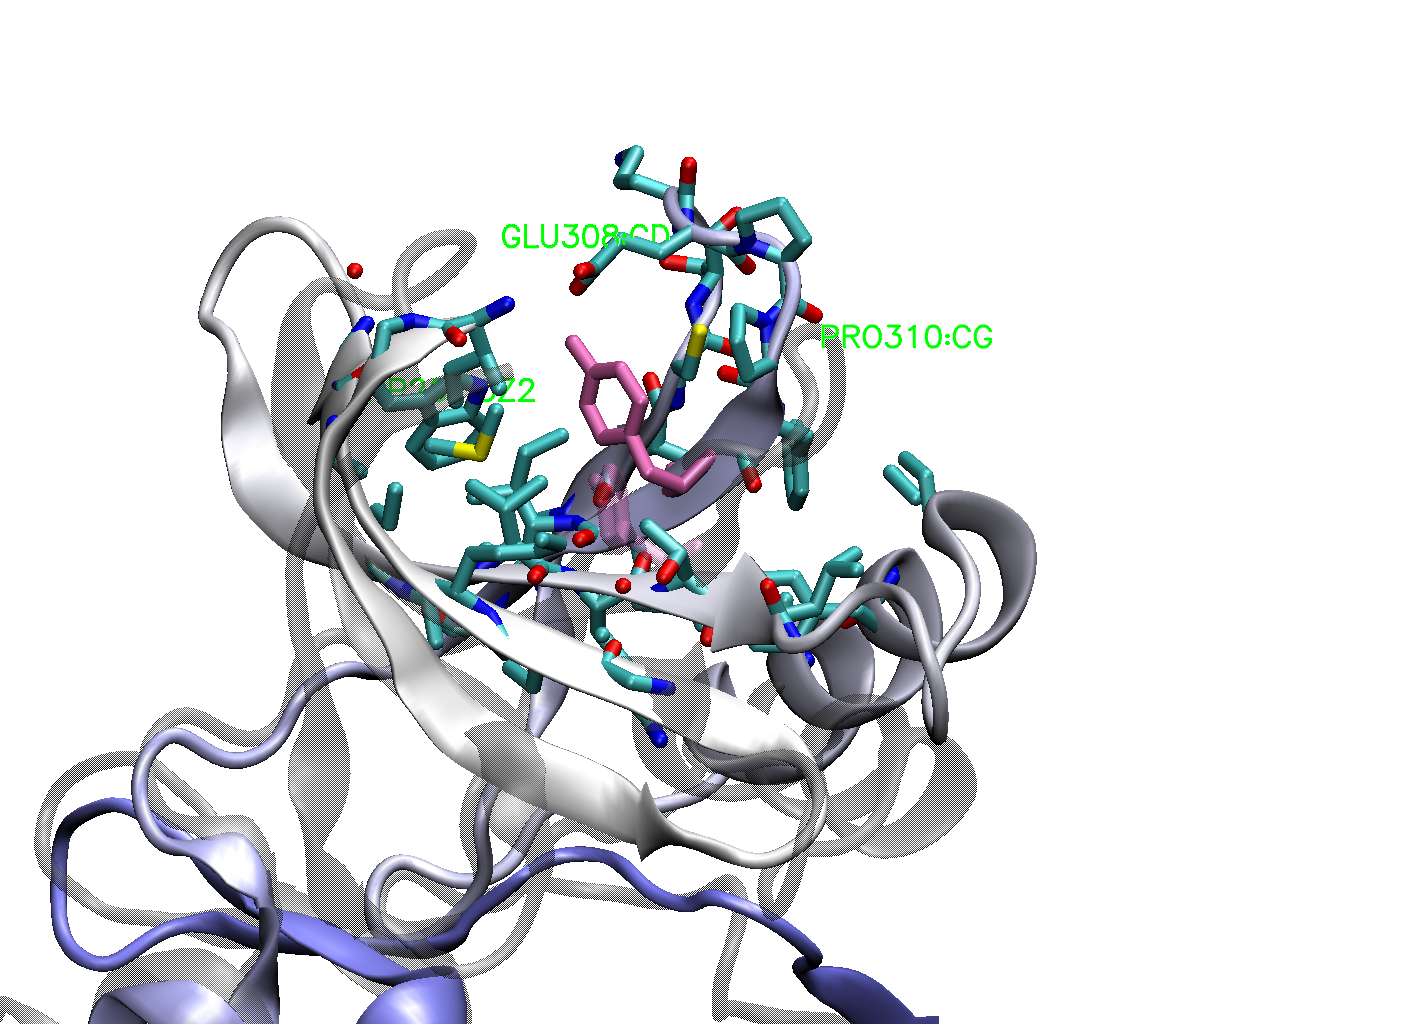

In [107]:
img1 = Image.open(f'{outdir}/q2_r312_fr1405.png')
img2 = Image.open(f'{outdir}/q2_r312_fr3925.png')
display(img1)

This first state is residue 312 (coloured in mauve) in a coil state (frame 1405). As res312 is a TYR, we see it forming a cute h-bond with GLU 308! I believe this, among other things, could be causing it to have a more extended, open conformation, turing this specific residue from the beta sheet it was in to more of a coil as identified by md.compute_dssp(). 

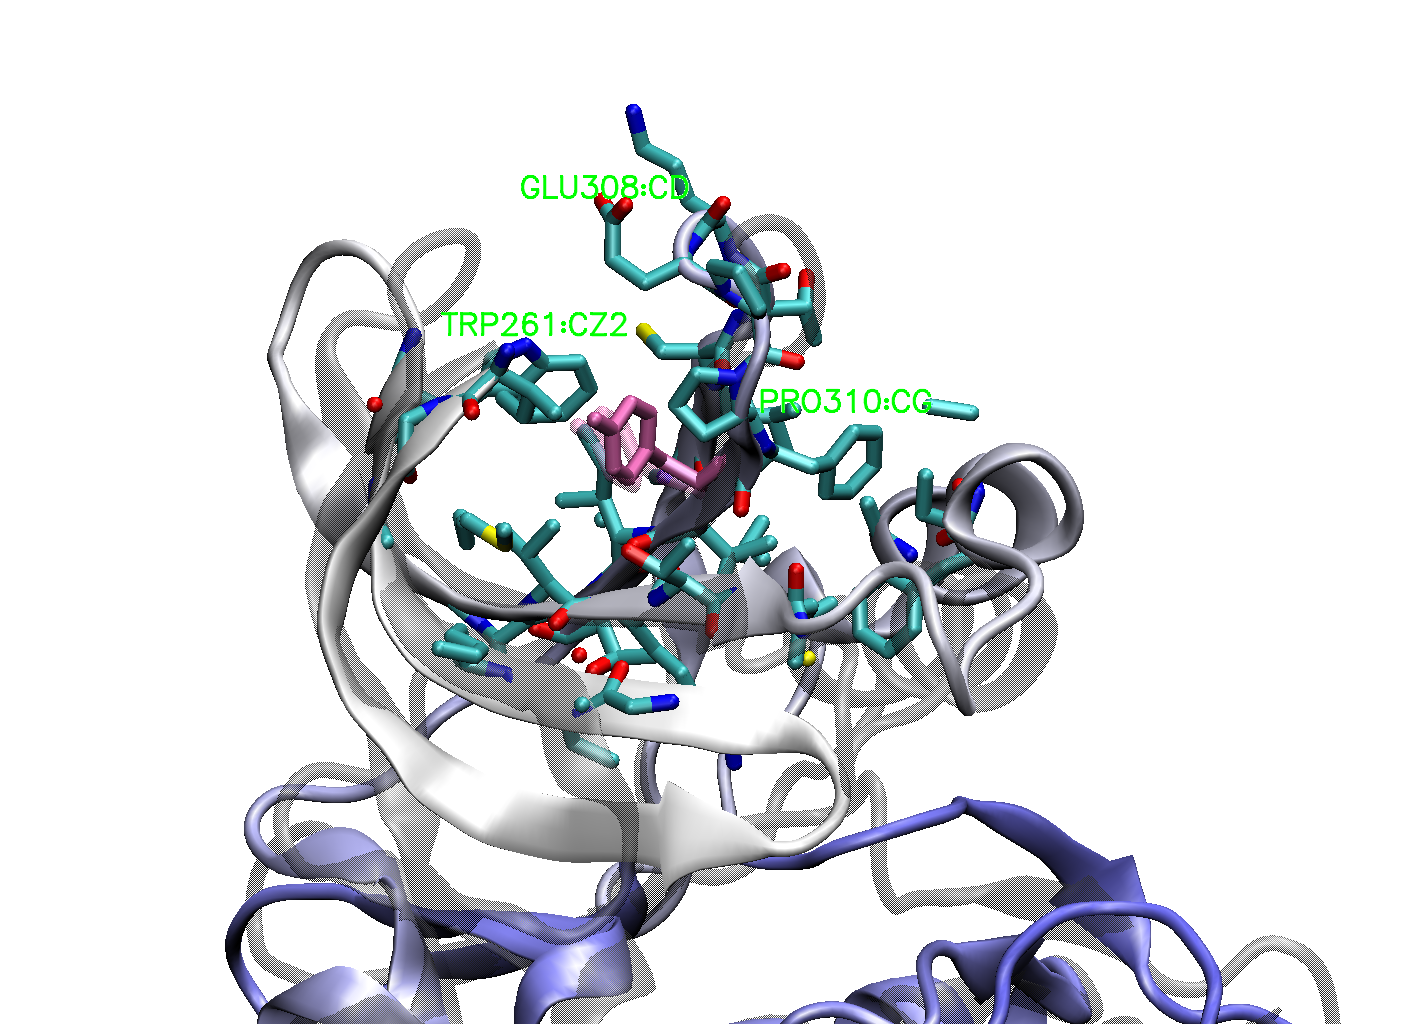

In [106]:
display(img2)

Here, we see that the h-bond with GLU308 has been destroyed. Instead, TYR312 seems to have some aromatic stacking going on with TRP 261, or even something going on with this PRO310. Regardless, it seems to be in a tighter hydrophobic-like core, favoring the beta sheet as indicated by md.compute_dssp(). 

### Setting up for HW3/HW4 ###

In [111]:
indices_phi, phis = md.compute_phi(trj)
indices_psi, psis = md.compute_psi(trj)
indices_chi1, chi1s = md.compute_chi1(trj)
indices_chi2, chi2s = md.compute_chi2(trj)

In [112]:
# atoms used to calculate phi
indices_phi.shape

(251, 4)

In [113]:
# for every frame: 
# the actual phi angles for each residue except the first one? 
phis.shape

(4000, 251)

In [114]:
phi_dict={}
dihedral_dict = { 'phi': {},
          'psi': {},
          'chi1': {},
          'chi2': {}}

for i in range(0,len(indices_phi)):
  indices=indices_phi[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['phi'][resnum]=phis[:,i]

for i in range(0,len(indices_psi)):
  indices=indices_psi[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['psi'][resnum]=psis[:,i]

for i in range(0,len(indices_chi1)):
  indices=indices_chi1[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['chi1'][resnum]=chi1s[:,i]

for i in range(0,len(indices_chi2)):
  indices=indices_chi2[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['chi2'][resnum]=chi2s[:,i]

In [215]:
#Heres a function to plot a phi/psi ramachandran plot:

def plot_phipsi(res, vlines=None, hlines=None):
    """ Plotting the phi and psi for a given residue, for all frames """
    plt.hist2d(dihedral_dict['phi'][res],dihedral_dict['psi'][res],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
    plt.xlabel('$\phi$', size=18)
    plt.ylabel('$\psi$', size=18)
    plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
    plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
    plt.tick_params(labelsize=18)
    if vlines != None: 
        for v in vlines: 
            plt.axvline(v, color='gray', lw=2)
    if hlines != None: 
        for h in hlines: 
            plt.axhline(h, color='gray', lw=2)
    plt.show()
    return

def plot_chi(res, title=None, v_lines=None):
    """ Plotting the chi angle for a given residue, for all frames"""
    if res in dihedral_dict['chi1']:
        plt.hist(dihedral_dict['chi1'][res],bins=36,range=[-3.14,3.14])        
        plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
        plt.xlabel('$\chi_1$', size=18)
        plt.ylabel('counts', size=18)
        plt.tick_params(labelsize=18)
          
    if res in dihedral_dict['chi2']:
        plt.hist2d(dihedral_dict['chi1'][res],dihedral_dict['chi2'][res],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
        plt.xlabel('$\chi_1$', size=18)
        plt.ylabel('$\chi_2$', size=18)
        plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
        plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
        plt.tick_params(labelsize=18)
    if title != None: 
        plt.title(title)
    if v_lines != None: 
        for v in v_lines: 
            plt.axvline(v, color='indigo', label='rotamer sampled', lw=2)
    plt.legend()


    return


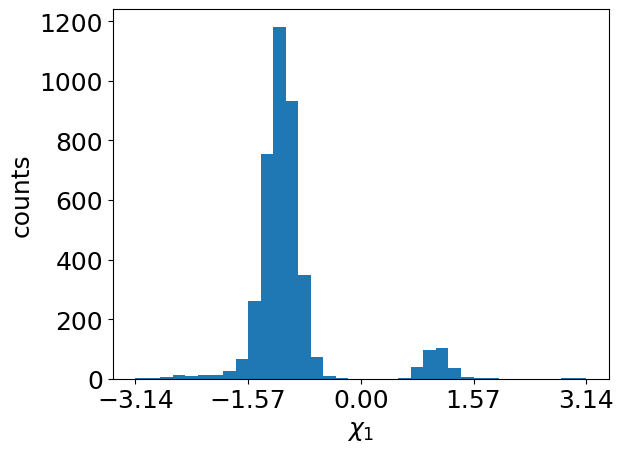

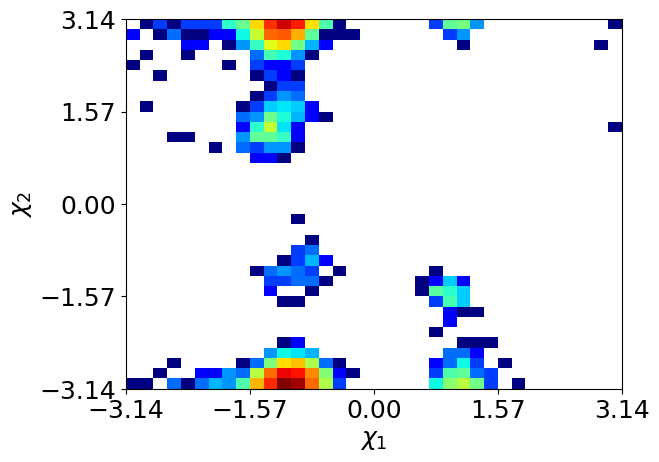

In [117]:
# prolines and glycines are funky! 
#plot_phipsi(308)

# see which rotamers are dominant 
#plt.clf()

# we're gonna find states of minor and major rotamers and visualize them~ :) 
plot_chi(308)

In [19]:
#Lets Visualize Some Rotamers
#Lets Find all the VAL residues and plot thier X1 values
CA_sel=top.select('name CA')
resnames=[]
resnums=[]
for i in CA_sel:
 resnum=top.atom(i).residue.resSeq
 resnums.append(resnum)
 resname=top.atom(i).residue.name
 resnames.append(resname)

resnums=np.asarray(resnums)
resnames=np.asarray(resnames)
VAL_indices=np.where(resnames=='VAL')
Val_resnums=resnums[VAL_indices]
Val_resnums

array([256, 260, 268, 270, 280, 289, 299, 304, 335, 338, 339, 371, 377,
       379, 422, 427, 448, 468])

In [108]:
# for i in Val_resnums:
#     print("Residue",i)
#     plot_phipsi(i)
#     plt.clf()
#     plot_chi(i)
#     plt.clf()

### ***HOMEWORK Problem 3*** ###

**Identify a residue that has 2 rotameric states and make representative snapshots to illustrate the 2 conformations (or a single snapshot with an overlay of two representative conformations).  Can you identify any other structural changes in the vicinity of that residue that favor the 2nd conformation.  Make a plot of the Chi 1 histogram (or Chi1/Chi2 if the residue has a Chi2 degree of freedom) and add a marking to the plot to indicate the dihedrals shown in your snapshot**



In [144]:
res_idx = 280
sequence[res_idx-242]

VAL280

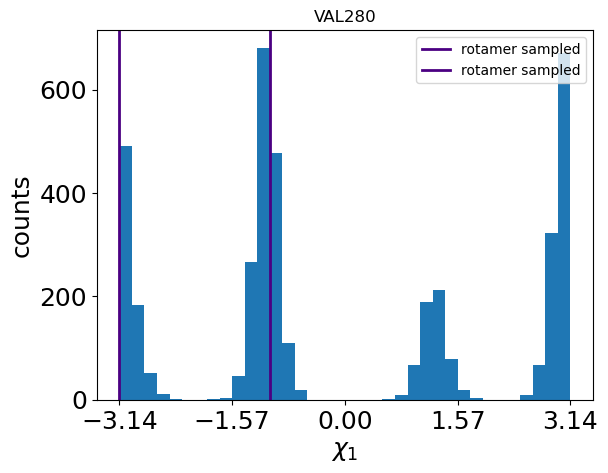

In [172]:
plot_chi(res_idx, title='VAL280', v_lines=[-np.pi, -np.pi/3])

In [146]:
# finding frames where chi1 is between -1.6 and 0 
np.where((dihedral_dict['chi1'][res_idx] < 0) & (dihedral_dict['chi1'][res_idx]>-1.7))[0]

array([   8,    9,   10, ..., 3997, 3998, 3999])

In [147]:
#finding the frames where chi1 is between -1.6 and -3.14
np.where((dihedral_dict['chi1'][res_idx] < -1.6) & (dihedral_dict['chi1'][res_idx]>-3.14))[0]

array([   1,    2,    3,    4,    5,  160,  162,  169,  170,  172,  185,
        186,  189,  192,  193,  194,  196,  197,  199,  200,  203,  208,
        473,  474,  475,  494,  496,  497,  498,  506,  507,  513,  555,
        606,  609,  615,  616,  618,  630,  648,  650,  656,  657,  661,
        662,  665,  676,  691,  697,  715,  716,  718,  721,  732,  734,
        740,  741,  744,  750,  753,  772,  775,  778,  779,  780,  785,
        794,  796,  797,  799,  803,  805,  811,  813,  814,  819,  827,
        828,  829,  831,  836,  841,  846,  848,  849,  852,  880,  881,
        883,  885,  888,  891,  892,  899,  907,  922,  925,  929,  930,
        931,  933,  936,  938,  946,  947,  948,  950,  951,  962,  969,
        977,  980,  985,  988,  989,  991,  992,  996, 1000, 1002, 1008,
       1015, 1016, 1017, 1032, 1035, 1036, 1037, 1038, 1044, 1050, 1057,
       1058, 1059, 1061, 1063, 1064, 1065, 1066, 1087, 1088, 1090, 1093,
       1096, 1098, 1099, 1101, 1102, 1106, 1108, 11

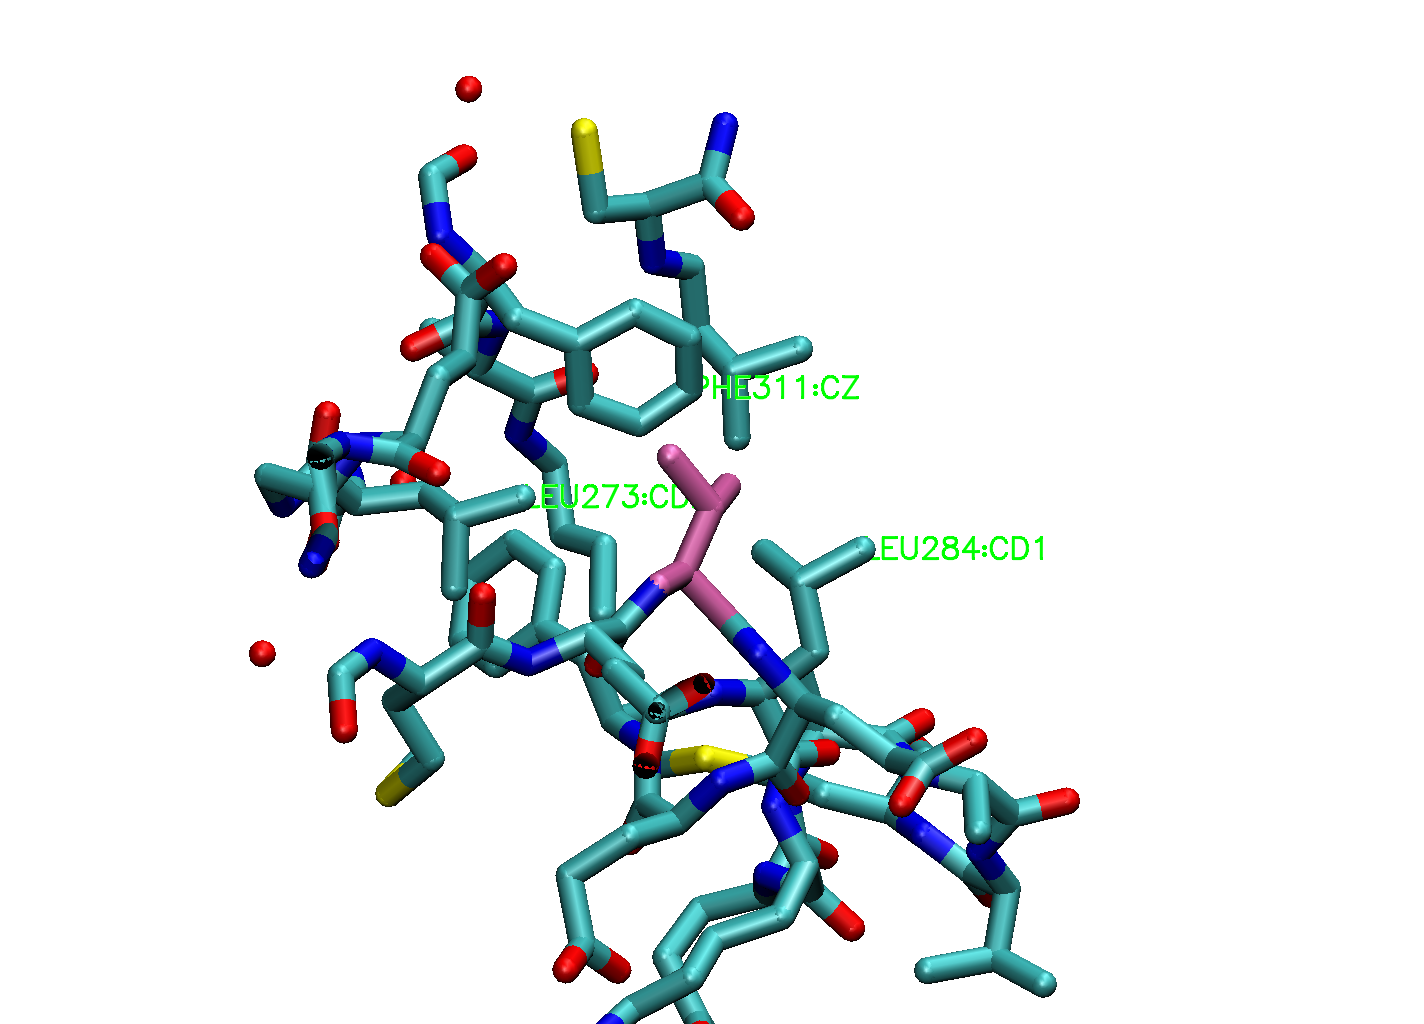

In [150]:
img1 = Image.open(f'{outdir}/q3_r280_fr9.png') # -1.57 < chi1 < 0
img2 = Image.open(f'{outdir}/q3_r280_fr1058.png') # -3.14 < chi1 < -1.57
# the trans rotamer 
display(img2)

So, here we have the pi rotamer, or the trans conformation of VAL280. You can see here that it's sort of nicely tucked away in its little hydrophobic friend group, making contacts with nearby LEU273, LEU284, and PHE311. 

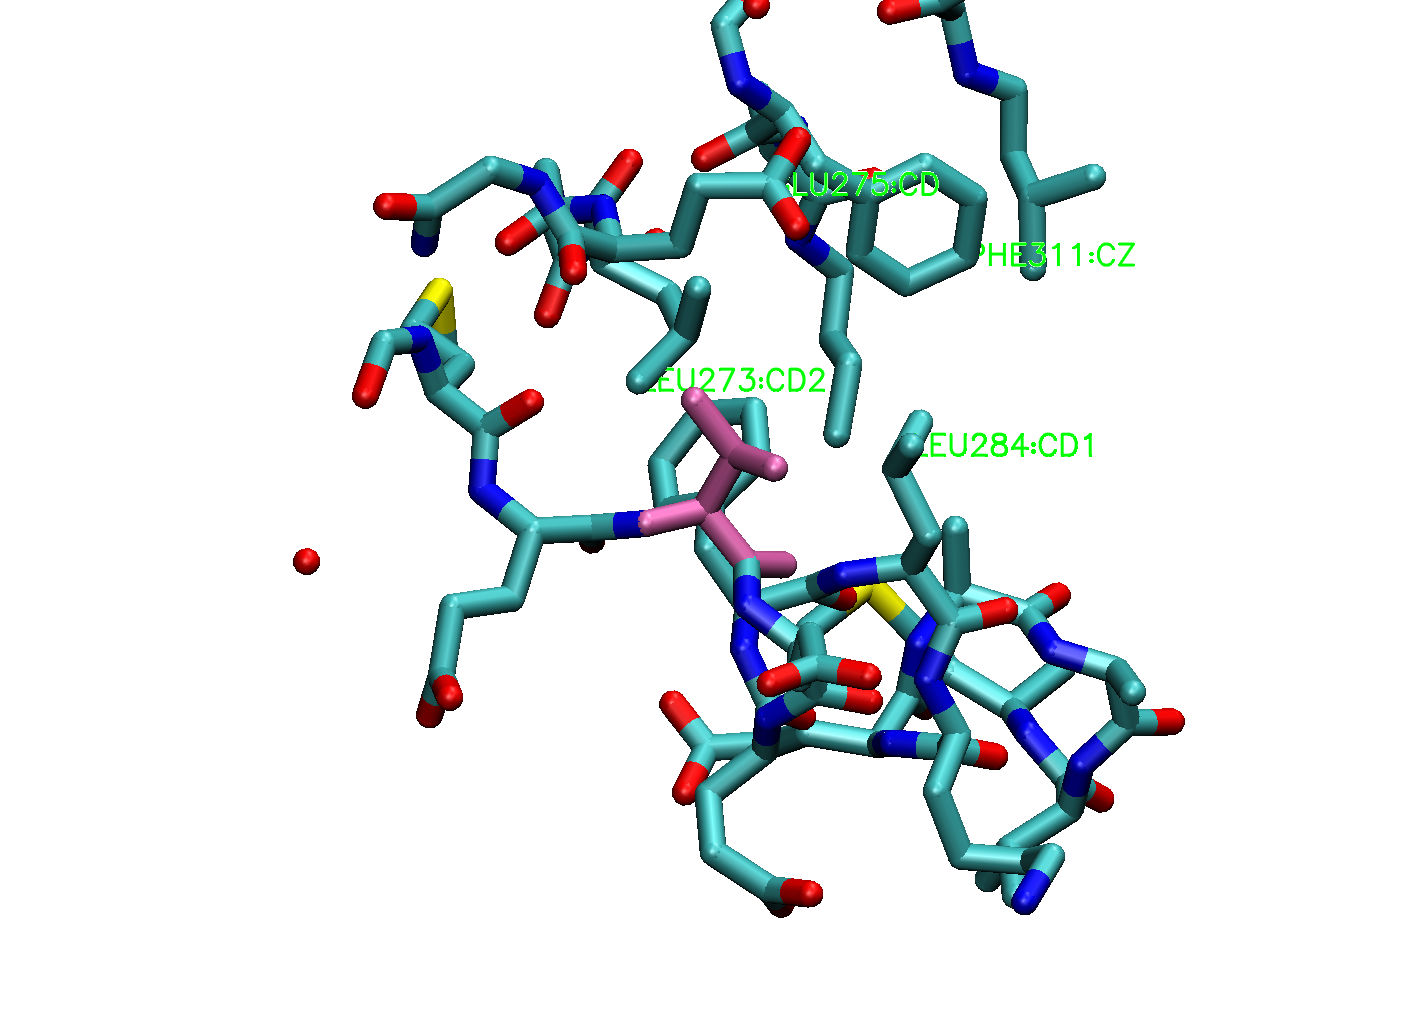

In [151]:
# the staggered gauche rotamer 
display(img1)

Ahhhh! What happened!!! Here we have the pi/3 rotamer, or this staggered gauche conformation. We can see that although contacts remained with the two LEU's, we have broken contact with PHE311, possibly because this big polar meanie GLU275 shoved its way in there. It makes sense then why this is the higher energy rotamer, when the contacts are not as favorable as the trans rotamer we saw before. 

### ***HOMEWORK Problem 4*** ###

**Identify a residue that has 2 phi/psi free energy minima states and make representative snapshots to illustrate representative conformations (or a single snapshot with an overlay of two representative conformations).  Can you identify any other structural changes in the vicinity of that residue that favor the 2nd conformation.  Make a plot of the phi/psi histograms and add marking to the plot to indicate the phi/psi angles shown in your snapshot**


LYS262


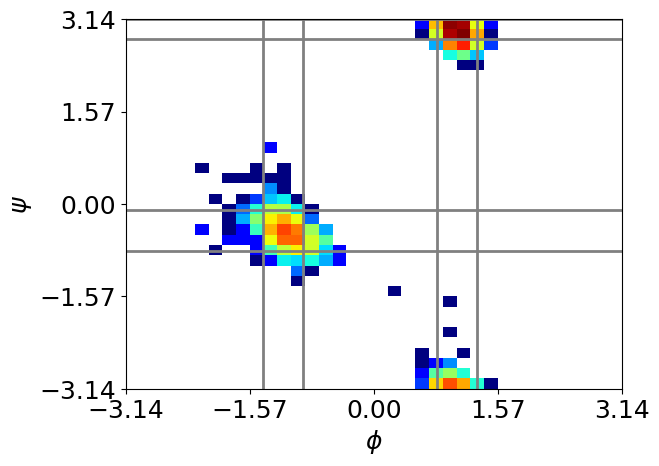

In [223]:
# Let's try one of the residues involved in a h-bond turn
res_idx = 262
print(sequence[res_idx-242])
plot_phipsi(res_idx, vlines=[-1.4, -.9, .8, 1.3], hlines=[-.8, -.1, 3.14, 2.8])

In [219]:
# sweet!! Now let's find the frames of the two hot spots I'm looking at: 
np.where((dihedral_dict['phi'][res_idx] > -1.4) & (dihedral_dict['phi'][res_idx] < -.9)  &
         (dihedral_dict['psi'][res_idx] > -.8) & (dihedral_dict['psi'][res_idx] < -.1))

(array([   0,    1,    2,    3,    4,    6,    7,    9,   10,   12,   13,
          15,   16,   17,   18,   19,   21,   22,   23,   25,   27,   28,
          29,   31,   33,   35,   36,   39,   41,   42,   45,   46,   51,
          55,   56,   58,   59,   60,   61,   62,   64,   65,   66,   67,
          68,   71,   72,   74,   75,   76,   78,   79,   81,   86,   88,
          90,   91,   92,   93,   94,   95,   97,   98,   99,  100,  101,
         105,  106,  107,  108,  109,  112,  113,  114,  115,  116,  117,
         119,  122,  123,  125,  126,  127,  129,  130,  131,  132,  133,
         134,  136,  138,  139,  140,  142,  144,  145,  146,  147,  148,
         149,  150,  151,  154,  155,  156,  157,  159,  160,  161,  162,
         163,  164,  166,  167,  170,  172,  173,  176,  180,  181,  184,
         186,  187,  188,  189,  190,  191,  193,  194,  197,  198,  199,
         200,  201,  202,  203,  204,  205,  206,  207,  208,  211,  212,
         214,  215,  216,  218,  220, 

In [228]:
np.where((dihedral_dict['phi'][res_idx] > .8) & (dihedral_dict['phi'][res_idx] < 1.3)  &
         (dihedral_dict['psi'][res_idx] > 2.8) & (dihedral_dict['psi'][res_idx] < 3.14))

(array([1343, 1344, 1345, ..., 3997, 3998, 3999]),)

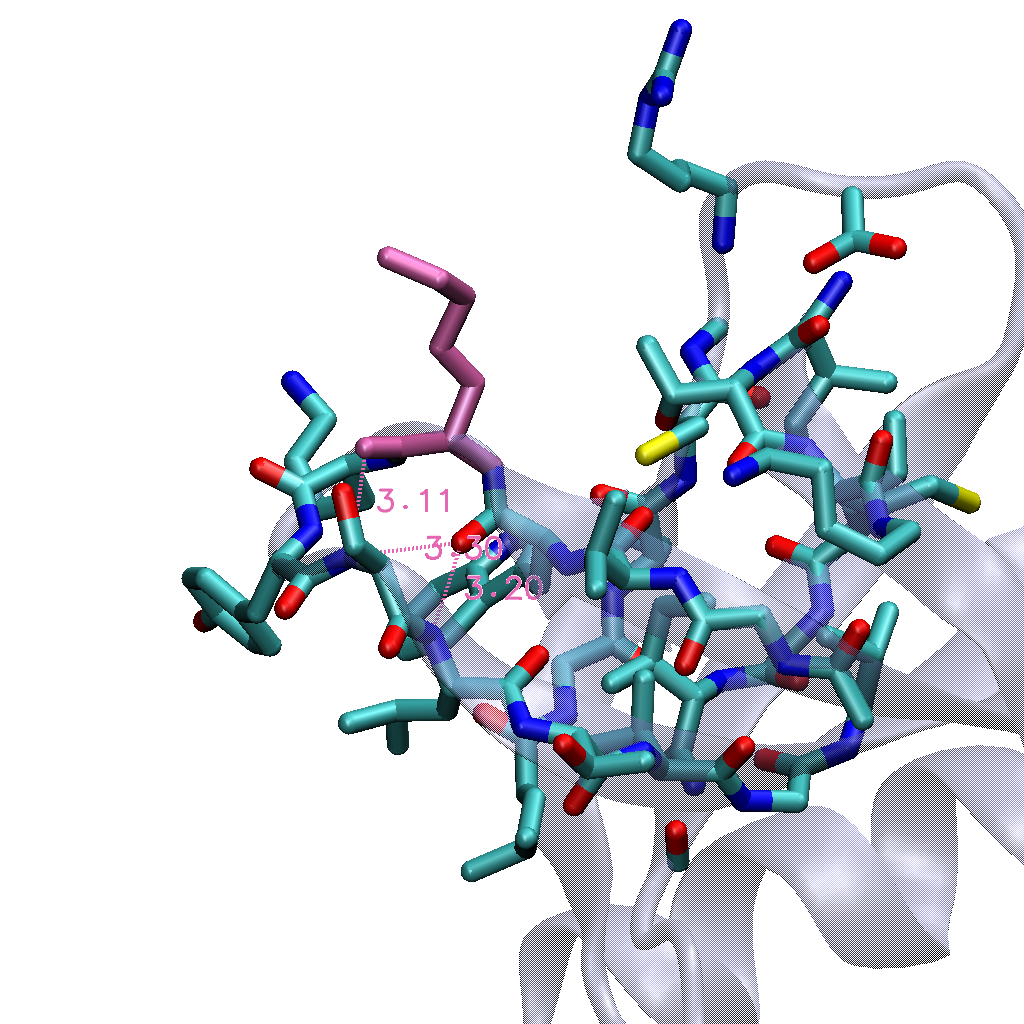

In [230]:
# remember, phi is the one with the N-CA, psi is the one with the CA-C'
img1 = Image.open(f'{outdir}/q4_r262_fr17.png') # -1.4 < phi< -.9, -.8 < psi < -.1
img2 = Image.open(f'{outdir}/q4_r262_fr1344.png') # .8 < phi <1.3 , 2.8 < psi < 3.14

# pi/3 for phi, damn near beclipsed for psi 
display(img1)

So here is a higher energy rotamer than the other basin, where we have staggered pi/3 for phi and almost completely eclipsed for psi! We can see here that LYS262 is part of a little loop connecting two beta strands, and is largely just sticking out of the protein into space. This makes sense, as LYS is a charged, polar residue, and therefore would not mind getting wet! All I can see here are the salt bridges between the carbonyl O and the H of the N on the backbone holding this into place. I'm not really sure what else locks it into this higher energy rotamer. 

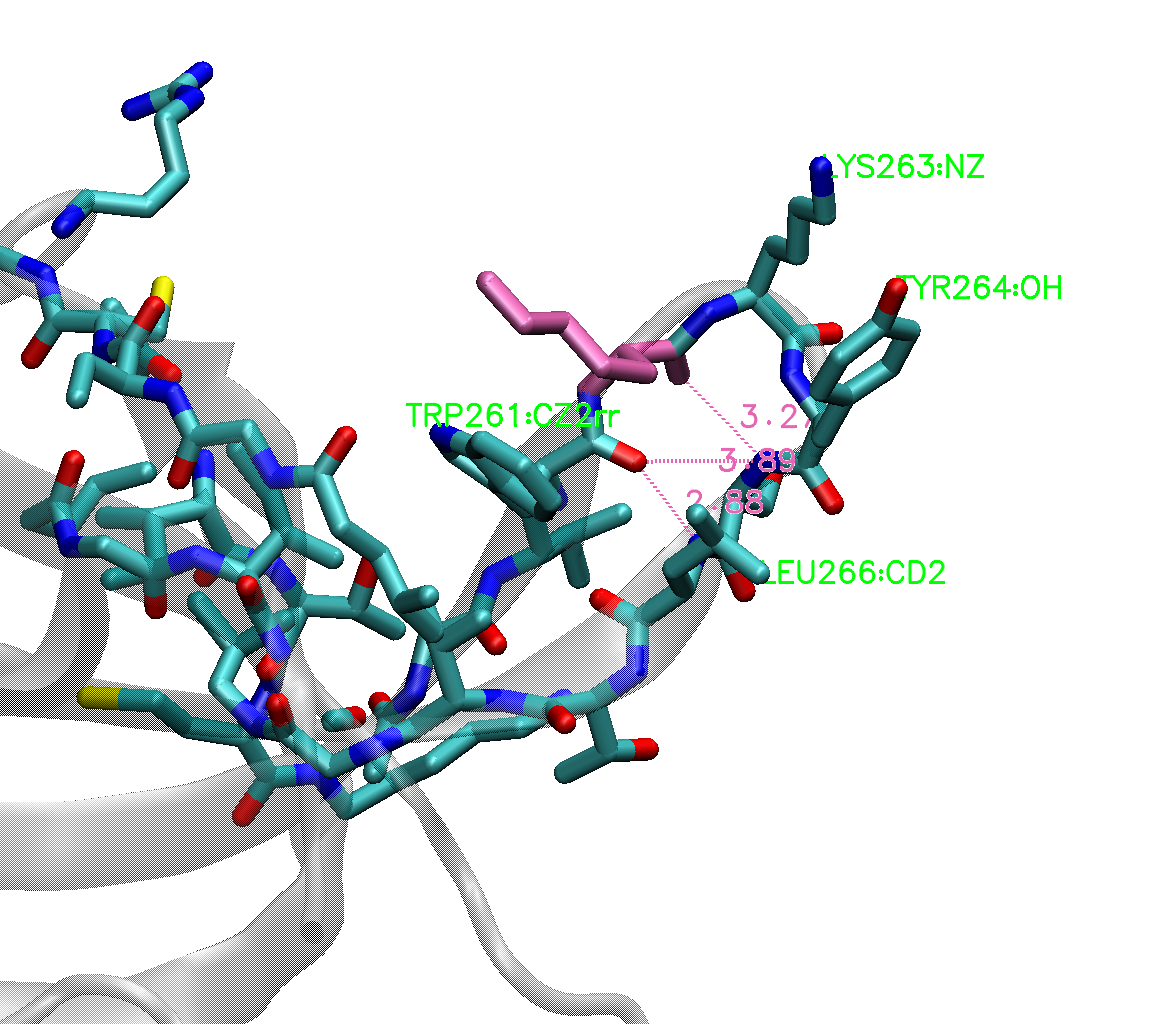

In [231]:
display(img2)

Here is the more populated basin! Where the phi angle is staggered at pi/3 and the psi angle is in its trans conformation at pi. Our salt bridges from before are still in tact we can see in our loop, and now we've formed an additional contact with the adjacent TRP261! I believe this is why this is the more populated basin that we see above in our phi psi plot, as this extra contact and the more favorable phi/psi angles make our little LYS262 extra happy :) 

### ***Challenge Problem 2*** ###
lol, maybe for another day~

**Identify a residue with phi/psi basins that favor distinct rotamers and make a plot of chi distributions for different regions of the phi/psi basins**


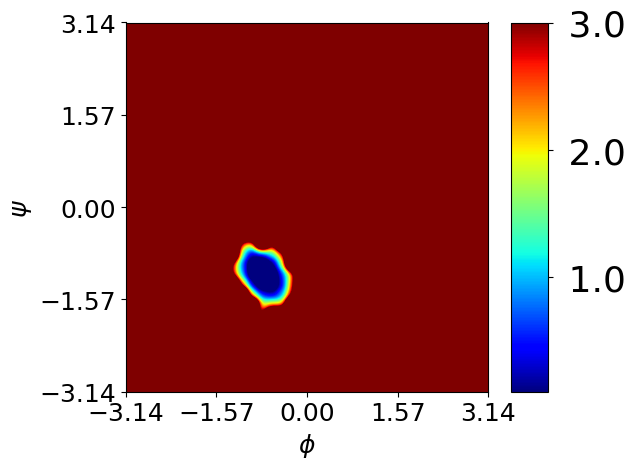

In [23]:
#Lets Make A Pretty Free Energy Plot 

def plot_phipsi_FES(res):
 free_energy,xedges,yedges=np.histogram2d(dihedral_dict['phi'][res],dihedral_dict['psi'][res],36,[[-3.14,3.14],[-3.14,3.14]],density=True,weights=None)
 free_energy=np.log(np.flipud(free_energy)+.000001)
 T=300                                                                                                  
 kbT=T*0.008314/4.184 # kT in kcal/mol
 dG=-(kbT)*free_energy #Convert to kcal/mol
 im=plt.imshow(dG, interpolation='gaussian',extent=[yedges[0], yedges[-1], xedges[0], xedges[-1]],cmap='jet',aspect='auto')
 cbar_ticks=[0,1,2,3]
 cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'), aspect=10) # grab the Colorbar instance
 imaxes = plt.gca()                                                                                                 
 plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.xlabel('$\phi$', size=18)
 plt.ylabel('$\psi$', size=18)
 plt.tick_params(labelsize=18)
 plt.axes(cb.ax)
 plt.clim(vmin=0.1,vmax=3.0)
 plt.yticks(size='26')
 plt.tight_layout()
 plt.show()
 return

plot_phipsi_FES(350)